# Capstone Project - Car accident severity

In [1]:
from IPython.core.display import display, HTML

## Introduction<br>

**Background**<br>
Deaths and injuries by road crash are highly concerning issues, with 1.35 million and 50 million people affected around the world, respectively. 

In 2018, the United States, being one of the busiest countries with nearly 280 million vehicles in operation and more than 227.5 million people holding a valid driving license, counted more than 38,000 deaths and 12 million vehicles involved in road crashes. 

Road crashes are the leading cause of deaths in the U.S. for people aged 1-54. An additional 4.4 million are injured seriously enough to require medical attention. According to OECD’s 2019 U.S. annual report, the economic costs of traffic crashes represents 1.6% of the GDP. When quality of life valuations are considered, the total value of societal harm from motor vehicle crashes is nearly 6% of GDP.


**Problem**<br>
In Seattle alone in 2018, the dataset provided by Seattle Department of Transportation (SDOT) counts over 3,500 injuries and 7,000 property-damage-only collisions in the same year. Thus, it is absolutely reasonable that various stakeholders would wish to minimize such numbers, and this project addresses the request to choose the suitable predictive model(s) of the possibility and severity of road crashes.

While potential stakeholders include:<br>
* Drivers, pedestrians, bicyclists, others using transportation services
* Transportation service providers
* Hospitals
* Government bodies, e.g. EMS, SPD, School Board, DoTransportation, DoHealth
* Other local and federal government bodies (policy-making side, social welfare-side, etc.)
* Insurers
* Corporations and employees
* Nonprofit organizations

In this project we will focus on finding the determining variables causing crashes and the most suitable predictive modeling for the responsible parties such as SDOT or SPD to be able to alert and/or educate drivers sufficiently to reduce the number of crashes and the severity of crashes.

### Data Description



<font color=pink>(Inner voice.. "should it be We or I"?)</font>

I have looked into multiple datasets and decided how or wether to use them for the defined goal as follows:<br>
**1. Collison records (SDOT)** provided by Seattle Department of Transportation (SDOT) found at [Kaggle](https://www.kaggle.com/jonleon/seattle-sdot-collisions-data), of more than 221,000 records over the period of 2004 - 2019.<br>
**2. Traffic Flow Counts** [ArcGis](https://www.esri.com/en-us/home) datasets found at [Seattle GeoData](https://data-seattlecitygis.opendata.arcgis.com/).<br>
**3. Collision records (WSP)** provided by [Washinton State Patrol](https://www.wsp.wa.gov/driver/collision-records/) which offers per-involved-party (driver/pedestrian/pedcyclist) detail records while 1. provides per-crash-a-record summary.<br>
**4. Weather data** available at [NOAA](https://search.usa.gov/search?utf8=%E2%9C%93&affiliate=ncdc&query=seattle).<br>
(5. Negative sample dataset - this will be explained in the data preparation section.)                              


Then having looked at them it has been decided 1. to be based as the positive dataset, and to create 5., though 2. would be perfectly accurate negative data.<br>
The following Data Understanding will reveal details of 1. and 3. as well as why 2. and 4. are not going to be used.

#### Data Understanding
##### Dataset: SDOT Collision records

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
#Read the dataset downloaded from Kaggle("https://www.kaggle.com/jonleon/seattle-sdot-collisions-data?select=Collisions.csv". Dataset has been downloaded from the website and uploaded here as below.
sdot = pd.read_csv('SDOT_Collisions.csv')
sdot.head()


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,...,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,...,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N


Attribute Information is [here](https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf)

In [4]:
sdot['ADDRTYPE'].value_counts()

Block           144857
Intersection     71823
Alley              874
Name: ADDRTYPE, dtype: int64

In [5]:
sdot['LOCATION'].value_counts()

BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N    298
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N          296
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB    291
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                    282
6TH AVE AND JAMES ST                                              276
                                                                 ... 
LINDEN AVE N AND N 104TH ST                                         1
23RD AVE NE BETWEEN NE 140TH S ST AND NE 140TH N ST                 1
NE 41ST ST BETWEEN 51ST E AVE NE AND NE LATIMER E PL                1
34TH AVE E BETWEEN E WARD ST AND E MADISON ST                       1
8TH E AVE S AND S LANDER N ST                                       1
Name: LOCATION, Length: 25193, dtype: int64

In [6]:
sdot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221266 entries, 0 to 221265
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                213797 non-null  float64
 1   Y                213797 non-null  float64
 2   OBJECTID         221266 non-null  int64  
 3   INCKEY           221266 non-null  int64  
 4   COLDETKEY        221266 non-null  int64  
 5   REPORTNO         221266 non-null  object 
 6   STATUS           221266 non-null  object 
 7   ADDRTYPE         217554 non-null  object 
 8   INTKEY           71823 non-null   float64
 9   LOCATION         216680 non-null  object 
 10  EXCEPTRSNCODE    100863 non-null  object 
 11  EXCEPTRSNDESC    11775 non-null   object 
 12  SEVERITYCODE     221265 non-null  object 
 13  SEVERITYDESC     221266 non-null  object 
 14  COLLISIONTYPE    194767 non-null  object 
 15  PERSONCOUNT      221266 non-null  int64  
 16  PEDCOUNT         221266 non-null  int6

In [7]:
#Frequency per Severity
sdot['SEVERITYDESC'].value_counts()

Property Damage Only Collision    137485
Injury Collision                   58698
Unknown                            21636
Serious Injury Collision            3098
Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

In [8]:
sdot['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              101579
At Intersection (intersection related)                69117
Mid-Block (but intersection related)                  24402
Driveway Junction                                     11495
At Intersection (but not related to intersection)      2495
Ramp Junction                                           190
Unknown                                                  21
Name: JUNCTIONTYPE, dtype: int64

In [9]:
sdot.groupby(['JUNCTIONTYPE'])['LIGHTCOND'].value_counts()

JUNCTIONTYPE                                       LIGHTCOND               
At Intersection (but not related to intersection)  Daylight                     1292
                                                   Dark - Street Lights On       467
                                                   Unknown                       229
                                                   Dusk                           53
                                                   Dawn                           21
                                                   Dark - No Street Lights        13
                                                   Dark - Street Lights Off       10
                                                   Other                           1
At Intersection (intersection related)             Daylight                    42418
                                                   Dark - Street Lights On     16329
                                                   Dusk                   

In [10]:
sdot['ST_COLDESC'].value_counts()

One parked--one moving                                                 44842
Entering at angle                                                      35469
From same direction - both going straight - one stopped - rear-end     26159
Fixed object                                                           14120
From same direction - both going straight - both moving - sideswipe    12944
                                                                       ...  
Railway Vehicle Strikes Pedalcyclist                                       3
Vehicle Strikes All Other Non-Domestic Animal                              2
Vehicle Hits State Road or Construction Machinery                          1
Non-domestic animal (deer, bear, elk, etc)                                 1
Vehicle Strikes Deer                                                       1
Name: ST_COLDESC, Length: 62, dtype: int64

In [11]:
import datetime as dt

sdot['INCDATE'] = pd.to_datetime(sdot['INCDATE'])
sdot['INCDTTM'] = pd.to_datetime(sdot['INCDTTM'])
sdot['dayofweek'] = sdot['INCDATE'].dt.dayofweek
sdot['weekend'] = sdot['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
sdot['week_number'] = sdot['INCDATE'].dt.week
sdot['month'] = sdot['INCDATE'].dt.month
sdot['year'] = sdot['INCDATE'].dt.year

sdot['year'].value_counts().sort_index()  


2003        1
2004    15457
2005    16016
2006    15794
2007    15082
2008    14139
2009    13275
2010    11958
2011    12416
2012    12732
2013    12757
2014    13212
2015    14260
2016    13955
2017    12477
2018    12198
2019    11204
2020     4333
Name: year, dtype: int64

#### Following contains visualization for observations on volume trend, seasonality, correlation, and data pre-processing.

<Figure size 432x288 with 0 Axes>

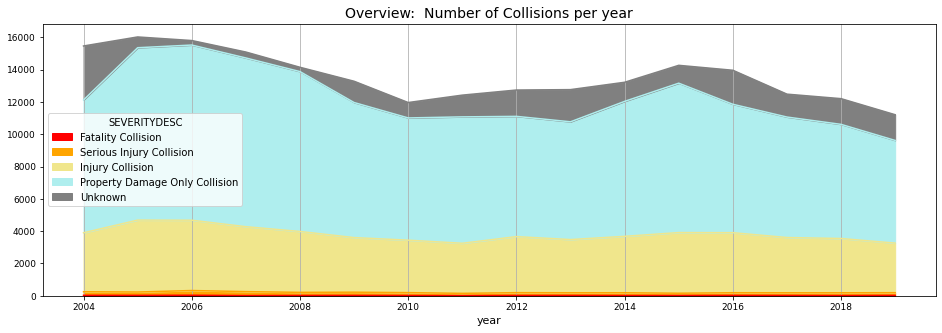

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

yr_0 = sdot.loc[sdot['year'].between(2004, 2019, inclusive=True)]

yr = (yr_0.groupby(['SEVERITYDESC'])['year'].value_counts().unstack(level=0))
yr = yr[['Fatality Collision', 'Serious Injury Collision', 'Injury Collision', 'Property Damage Only Collision', 'Unknown']]

fig = plt.figure()
yr.plot(kind='area', figsize=(16,5), stacked=True, color=('red','orange','khaki','paleturquoise','gray'), fontsize=9)
plt.gca().xaxis.grid(True)

plt.title('Overview:  Number of Collisions per year', fontsize=14)
plt.xlabel('year', fontsize=11)

plt.show()


##### Observation_1. After the increase in 2014 - 2015, the number has been declining.

Seasonality

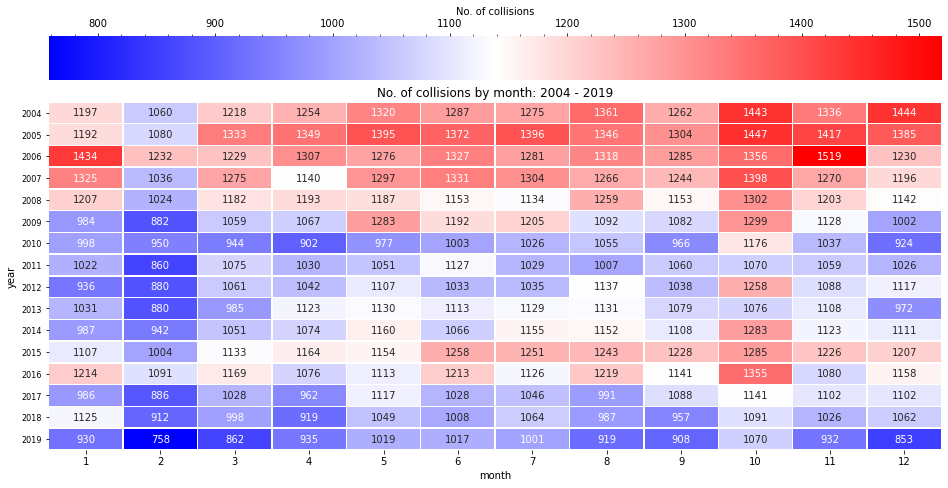

In [13]:
yr_0 = sdot.loc[sdot['year'].between(2004, 2019, inclusive=True)]
yr_0.set_index(yr_0['INCDATE'], drop=True, append=False, inplace=False)

#Creating heatmaps by-month, by-week heatmaps
import seaborn as sns
from natsort import natsorted

#per-Month
sdotcal = pd.DataFrame(yr_0.groupby(['year'])['month'].value_counts())
sdotcal.columns = ['collisions']
sdotcal.reset_index(inplace=True)

sdotcal.month =pd.Categorical(sdotcal.month,categories=natsorted(sdotcal.month.unique()),ordered=True)

smx1 = pd.pivot_table(sdotcal, values='collisions', index='year', columns='month')

fig, ax = plt.subplots(figsize=(16, 8))
smx1p = sns.heatmap(smx1, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='bwr', cbar_kws = dict(use_gridspec=False, location="top",
                            label='No. of collisions'))
smx1p.set_yticklabels(smx1p.get_ymajorticklabels(), fontsize = 8)
smx1p.set_xticklabels(smx1p.get_xmajorticklabels(), fontsize = 10)
cbar = ax.collections[0].colorbar.minorticks_on()
ax.set_title('No. of collisions by month: 2004 - 2019', fontsize=12) 

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

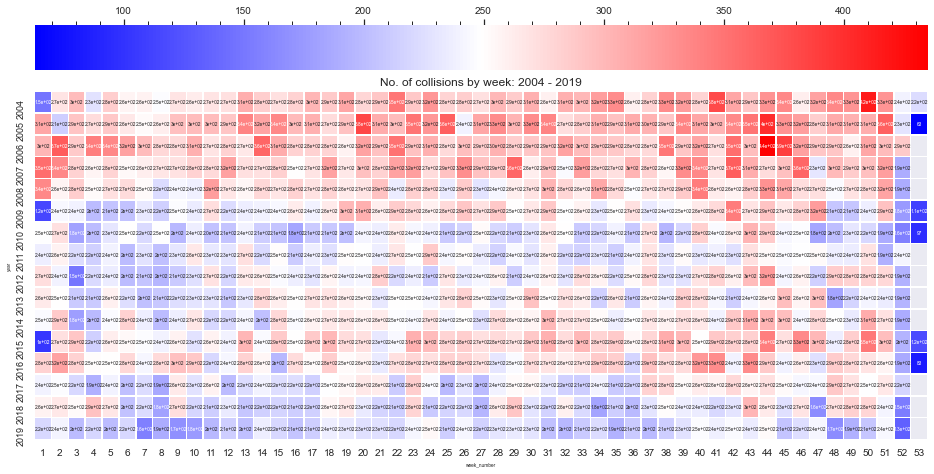

In [14]:
#per-Week
sdotcal1 = pd.DataFrame(yr_0.groupby(['year'])['week_number'].value_counts())
sdotcal1.columns = ['collisions']
sdotcal1.reset_index(inplace=True)

sdotcal1.week_number =pd.Categorical(sdotcal1.week_number,categories=natsorted(sdotcal1.week_number.unique()),ordered=True)

smx2 = pd.pivot_table(sdotcal1, values='collisions', index='year', columns='week_number')

sns.set(font_scale=0.4)
fig, ax = plt.subplots(figsize=(16, 8))
smx2p = sns.heatmap(smx2, annot=True, linewidths=.5, ax=ax, cmap='bwr', cbar_kws = dict(use_gridspec=False, location="top"))
smx2p.set_yticklabels(smx2p.get_ymajorticklabels(), fontsize = 9)
smx2p.set_xticklabels(smx2p.get_xmajorticklabels(), fontsize = 10)
cbar2 = ax.collections[0].colorbar.minorticks_on()
ax.set_title('No. of collisions by week: 2004 - 2019', fontsize=12) 

cbar2 = ax.collections[0].colorbar
cbar2.ax.tick_params(labelsize=10)

There is decrease over the past recent years except 2014-2015, thus looking in for 2014 - 2019

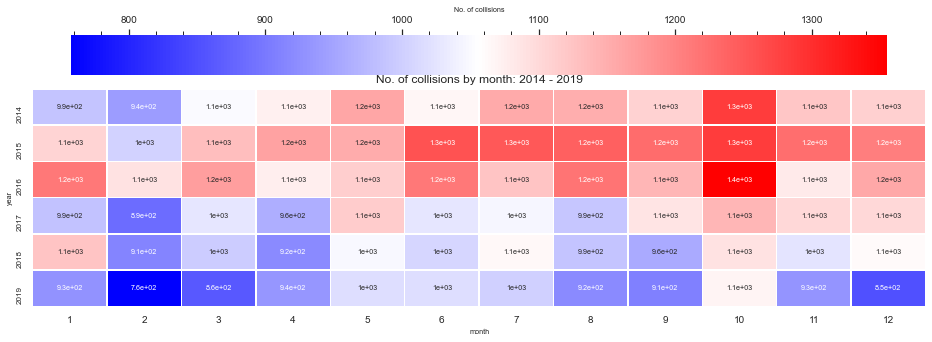

In [15]:
#per-Month
yr_5 = sdot.loc[sdot['year'].between(2014, 2019, inclusive=True)]
sdotcal5 = pd.DataFrame(yr_5.groupby(['year'])['month'].value_counts())
sdotcal5.columns = ['collisions']
sdotcal5.reset_index(inplace=True)

sdotcal5.month =pd.Categorical(sdotcal5.month,categories=natsorted(sdotcal5.month.unique()),ordered=True)

smx5 = pd.pivot_table(sdotcal5, values='collisions', index='year', columns='month')

sns.set(font_scale=0.6)
fig, ax = plt.subplots(figsize=(16, 5))
smx5p = sns.heatmap(smx5, annot=True, linewidths=.4, ax=ax, cmap='bwr', cbar_kws = dict(use_gridspec=False, location="top",
                            label='No. of collisions'))
smx5p.set_yticklabels(smx5p.get_ymajorticklabels(), fontsize = 8)
smx5p.set_xticklabels(smx5p.get_xmajorticklabels(), fontsize = 10)
cbar = ax.collections[0].colorbar.minorticks_on()
ax.set_title('No. of collisions by month: 2014 - 2019', fontsize=12) 

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

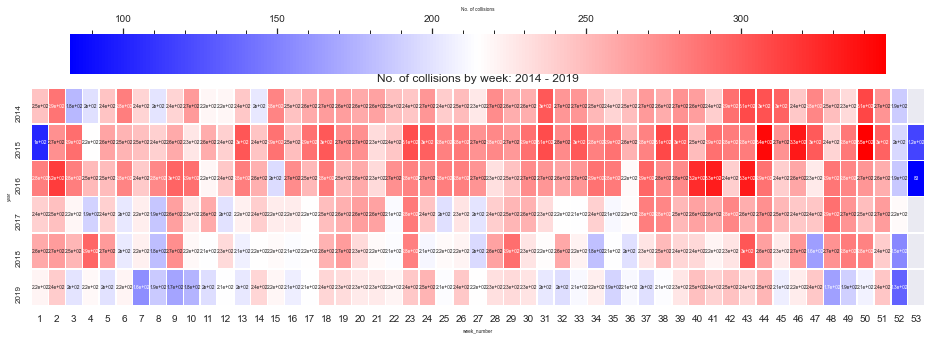

In [16]:
#per-Week
sdotcal5w = pd.DataFrame(yr_5.groupby(['year'])['week_number'].value_counts())
sdotcal5w.columns = ['collisions']
sdotcal5w.reset_index(inplace=True)

sdotcal5w.week_number =pd.Categorical(sdotcal5w.week_number,categories=natsorted(sdotcal5w.week_number.unique()),ordered=True)

smx5w = pd.pivot_table(sdotcal5w, values='collisions', index='year', columns='week_number')
sns.set(font_scale=0.4)
fig, ax = plt.subplots(figsize=(16, 5))
smx5wp = sns.heatmap(smx5w, annot=True, linewidths=.4, ax=ax, cmap='bwr', cbar_kws = dict(use_gridspec=False, location="top",
                            label='No. of collisions'))
smx5wp.set_yticklabels(smx5wp.get_ymajorticklabels(), fontsize = 8)
smx5wp.set_xticklabels(smx5wp.get_xmajorticklabels(), fontsize = 10)
cbar = ax.collections[0].colorbar.minorticks_on()
ax.set_title('No. of collisions by week: 2014 - 2019', fontsize=12) 

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

##### Observation_2. There appears to be no apparent seasonality, especially over the recent years.

Not every year is the same. There is no significant seasonality to be considered.<br>
Now we look at the circumstancial conditions.

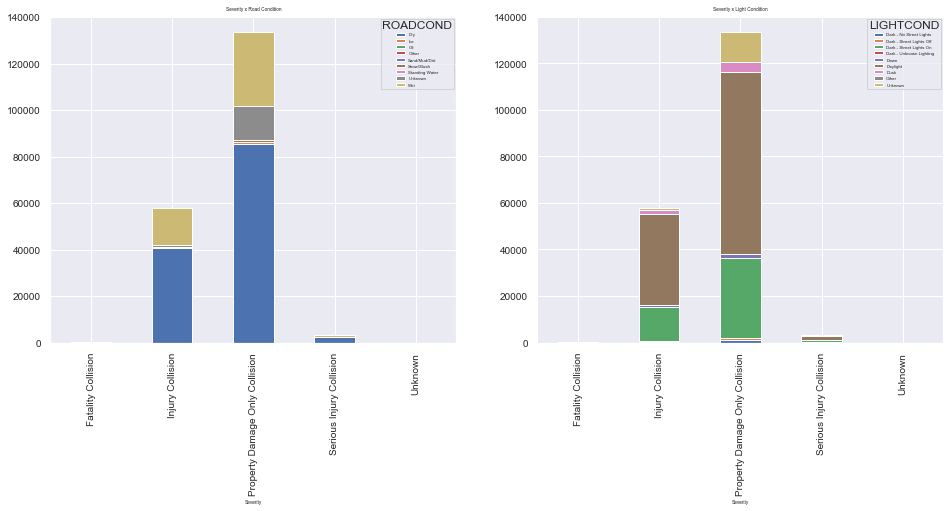

In [17]:
from matplotlib import gridspec

fig = plt.figure()
p1 = (sdot.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))
p2 = (sdot.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

p1.plot(kind='bar', figsize=(10,6), ax=ax0, stacked=True, fontsize=10)
ax0.set_title('Severity x Road Condition')
ax0.set_xlabel('Severity')

p2.plot(kind='bar', figsize=(16,6), ax=ax1, stacked=True, fontsize=10)
ax1.set_title('Severity x Light Condition')
ax1.set_xlabel('Severity')

plt.show()


##### It is more appearant without Property-only and Unknown

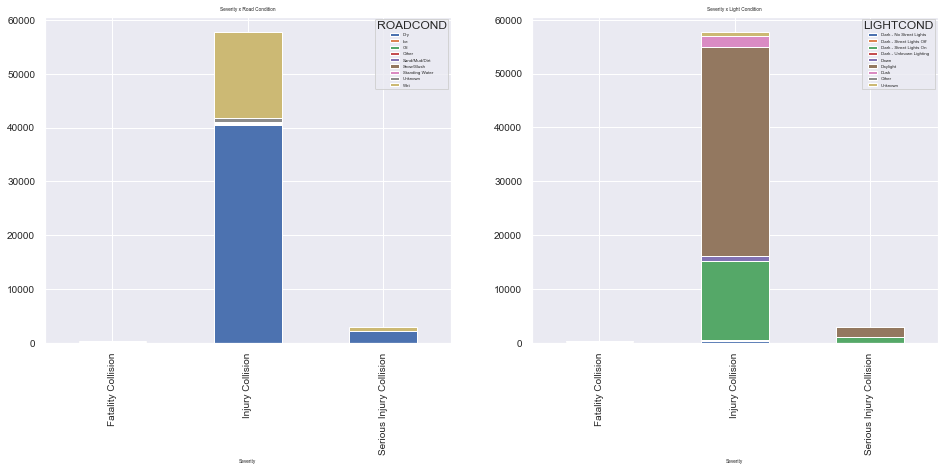

In [18]:
sdot_f = sdot.loc[sdot['SEVERITYDESC'].isin(['Fatality Collision','Injury Collision','Serious Injury Collision'])]

fig = plt.figure()
pf1 = (sdot_f.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))
pf2 = (sdot_f.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

pf1.plot(kind='bar', figsize=(10,6), ax=ax0, stacked=True, fontsize=10)
ax0.set_title('Severity x Road Condition')
ax0.set_xlabel('Severity')

pf2.plot(kind='bar', figsize=(16,6), ax=ax1, stacked=True, fontsize=10)
ax1.set_title('Severity x Light Condition')
ax1.set_xlabel('Severity')

plt.show()

##### It is so, with Fatality and Serious Injury only

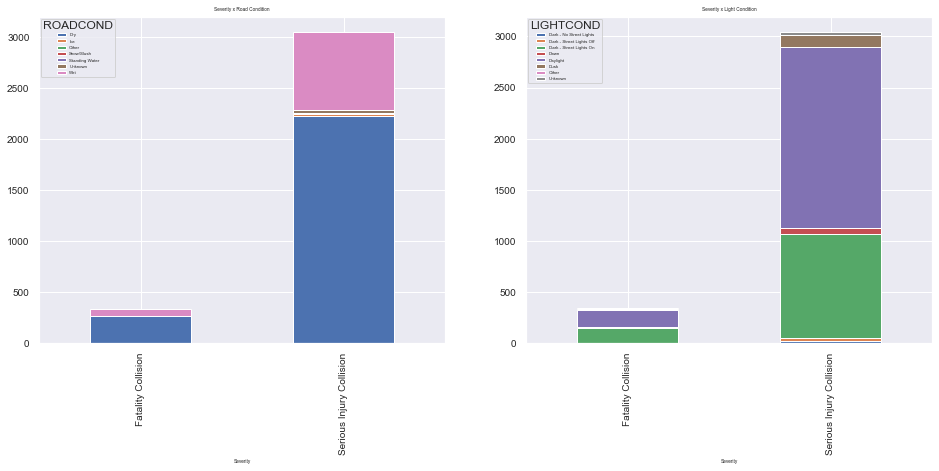

In [19]:
sdot_f = sdot.loc[sdot['SEVERITYDESC'].isin(['Fatality Collision','Serious Injury Collision'])]

fig = plt.figure()
pf1 = (sdot_f.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))
pf2 = (sdot_f.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

pf1.plot(kind='bar', figsize=(10,6), ax=ax0, stacked=True, fontsize=10)
ax0.set_title('Severity x Road Condition')
ax0.set_xlabel('Severity')

pf2.plot(kind='bar', figsize=(16,6), ax=ax1, stacked=True, fontsize=10)
ax1.set_title('Severity x Light Condition')
ax1.set_xlabel('Severity')

plt.show()

Below also displays the correlation between variables.

Text(0.5, 1.0, 'All collisions')

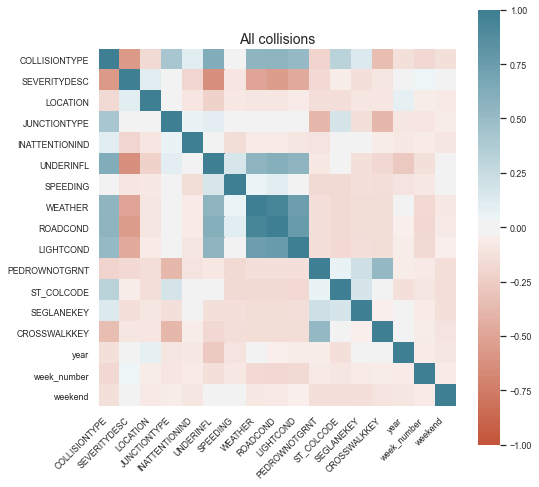

In [20]:
from sklearn.preprocessing import LabelEncoder

yr_0 = sdot.loc[sdot['year'].between(2004, 2019, inclusive=True)]
corrdf = yr_0[['COLLISIONTYPE', 'SEVERITYDESC', 'LOCATION','JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'year', 'week_number', 'weekend']]

# Categorical -> Numerical
corrdf2 = corrdf.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


sns.set(font_scale=0.8)
fig, ax = plt.subplots(figsize=(8, 8))

corr_p = sns.heatmap(
    corrdf2.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
corr_p.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
corr_p.set_title('All collisions', fontsize=14)

Text(0.5, 1.0, 'Injuries')

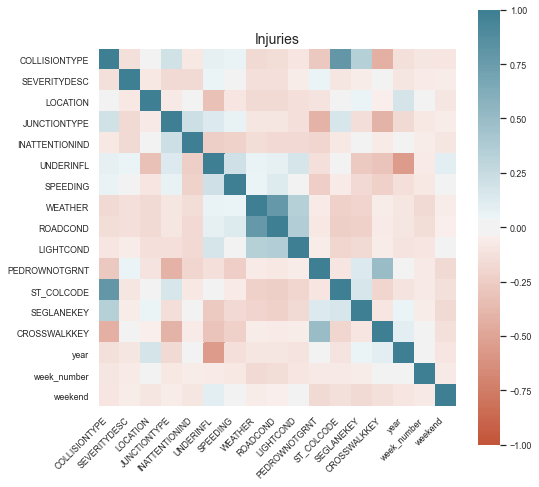

In [21]:
#limiting to injury-involved crashes 

#yr_0 is for 2010-2019
cor_inj = yr_0.loc[yr_0['SEVERITYDESC'].isin(['Fatality Collision','Injury Collision','Serious Injury Collision'])]

cor_inj2 = cor_inj[['COLLISIONTYPE', 'SEVERITYDESC', 'LOCATION', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'year', 'week_number', 'weekend']]

# Categorical -> Numerical
cor_inj2N = cor_inj2.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


sns.set(font_scale=0.8)
fig, ax = plt.subplots(figsize=(8, 8))

corr_p2 = sns.heatmap(
    cor_inj2N.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
corr_p2.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
corr_p2.set_title('Injuries', fontsize=14)

##### Observation_3. Weather, road and light conditions are correlative among themselves but do not specifically point out any other possible correlation.
<br>


Thus we may need to look at other aspects that are not in this dataset, which is more personal attributes and the data search has led to the 3. WSP dataset.


#### Dataset: WSP Collision records

In [22]:
#Extracted the data for Seattle at https://fortress.wa.gov/wsp/collisionanalysistool/

wa = pd.read_csv('WA_Crash_Data.csv', error_bad_lines=False)
wa.head(10)


b'Skipping line 120277: expected 218 fields, saw 219\nSkipping line 120278: expected 218 fields, saw 219\nSkipping line 120444: expected 218 fields, saw 219\nSkipping line 120445: expected 218 fields, saw 219\nSkipping line 120708: expected 218 fields, saw 219\nSkipping line 120709: expected 218 fields, saw 219\nSkipping line 121601: expected 218 fields, saw 219\nSkipping line 121602: expected 218 fields, saw 219\nSkipping line 121603: expected 218 fields, saw 219\nSkipping line 122360: expected 218 fields, saw 219\nSkipping line 122361: expected 218 fields, saw 219\n'
b'Skipping line 123303: expected 218 fields, saw 219\nSkipping line 123304: expected 218 fields, saw 219\nSkipping line 123968: expected 218 fields, saw 219\nSkipping line 124327: expected 218 fields, saw 219\nSkipping line 124328: expected 218 fields, saw 219\nSkipping line 125267: expected 218 fields, saw 219\nSkipping line 125268: expected 218 fields, saw 219\nSkipping line 126203: expected 218 fields, saw 220\nSkippi

,Colli_Rpt_Num_Colli_Rpt_Num,Colli_Rpt_Num_Colli_Surr_Key,Colli_Rpt_Num_Trans_Date_Time,Colli_Rpt_Num_Colli_Rpt_Typ_Surr_Key,Colli_Rpt_Num_Colli_Entry_Date_Time,Colli_Rpt_Num_QA_Typ_Cd,Colli_Rpt_Num_QA_Date_Time,Colli_Rpt_Num_Colli_Rpt_Src_Typ_Cd,Location_Id,Location_Colli_Rpt_Num,...,Pedcyc_Drvr_CitationCharge,Pedcyc_Drvr_DeathAfter30DaysFlag,Pedcyc_Pasngr_Colli_Surr_Key,Pedcyc_Pasngr_Unit_Num,Pedcyc_Pasngr_Age,Pedcyc_Pasngr_Gender_Typ_Cd,Pedcyc_Pasngr_Helmet_Use_Cd,Pedcyc_Pasngr_Injur_Typ_Cd,Pedcyc_Pasngr_Seat_Pos_Typ_Cd,Pedcyc_Pasngr_DeathAfter30DaysFlag
0,3590096,1669241,11/14/2013 3:42:15 PM,3,11/14/2013 3:42:15 PM,4.0,NaN,1,58,3590096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3590096,1669241,11/14/2013 3:42:15 PM,3,11/14/2013 3:42:15 PM,4.0,NaN,1,58,3590096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3590096,1669241,11/14/2013 3:42:15 PM,3,11/14/2013 3:42:15 PM,4.0,NaN,1,58,3590096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E284929,1669250,11/14/2013 4:01:35 PM,2,11/14/2013 4:01:34 PM,4.0,NaN,1,67,E284929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E284929,1669250,11/14/2013 4:01:35 PM,2,11/14/2013 4:01:34 PM,4.0,NaN,1,67,E284929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,E284930,1669251,11/14/2013 4:01:36 PM,2,11/14/2013 4:01:35 PM,4.0,NaN,1,68,E284930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,E284930,1669251,11/14/2013 4:01:36 PM,2,11/14/2013 4:01:35 PM,4.0,NaN,1,68,E284930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E285121,1669453,7/4/2016 5:30:08 AM,1,11/15/2013 12:25:56 AM,NaN,NaN,1,369809,E285121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,E285121,1669453,7/4/2016 5:30:08 AM,1,11/15/2013 12:25:56 AM,NaN,NaN,1,369809,E285121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,E285123,1669455,11/15/2013 12:25:57 AM,1,11/15/2013 12:25:58 AM,4.0,NaN,1,272,E285123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Checking how Colli_Rpt_Num_Colli_Rpt_Num is multiple
from IPython.display import display
wa2 = wa.loc[wa['Colli_Rpt_Num_Colli_Rpt_Num']=='3590096']
pd.options.display.max_columns = None           # want all the columns displayed
display(wa2)


,Colli_Rpt_Num_Colli_Rpt_Num,Colli_Rpt_Num_Colli_Surr_Key,Colli_Rpt_Num_Trans_Date_Time,Colli_Rpt_Num_Colli_Rpt_Typ_Surr_Key,Colli_Rpt_Num_Colli_Entry_Date_Time,Colli_Rpt_Num_QA_Typ_Cd,Colli_Rpt_Num_QA_Date_Time,Colli_Rpt_Num_Colli_Rpt_Src_Typ_Cd,Location_Id,Location_Colli_Rpt_Num,Location_Pri_Trfcway,Location_Distn_From_Ref_Pt,Location_Ref_Pt_Miles_Feet_Ind,Location_Cmps_Dirn_Typ_Cd,Location_Secondary_Trfcway,Location_Block_Num,Location_MilePost,Location_Ref_Pt_Block_MilePost_Ind,Location_Colli_Rpt_Typ_Surr_Key,Colli_Dtl_Info_Colli_Surr_Key,Colli_Dtl_Info_Rec_Stat_Typ,Colli_Dtl_Info_Colli_Date,Colli_Dtl_Info_Fire_Ind,Colli_Dtl_Info_Stol_Vehcl_Ind,Colli_Dtl_Info_Cty_Surr_Key,Colli_Dtl_Info_Cnty_Surr_Key,Colli_Dtl_Info_Hit_Run_Ind,Colli_Dtl_Info_Rdwy_Surfc_Cond_Typ_Cd,Colli_Dtl_Info_St_Rpt_Ind,Colli_Dtl_Info_Non_Trfc_Ind,Colli_Dtl_Info_Intnl_Ind,Colli_Dtl_Info_Med_Caused_Ind,Colli_Dtl_Info_Fed_Func_Cls_Surr_Key,Colli_Dtl_Info_Jct_Relat_Typ_Cd,Colli_Dtl_Info_Loc_Char_Typ_Cd,Colli_Dtl_Info_Rdwy_Char_Typ_Cd,Colli_Dtl_Info_Wea_Typ_Cd,Colli_Dtl_Info_Litng_Cond_Typ_Cd,Colli_Dtl_Info_Wrkzn_Typ_Cd,Colli_Dtl_Info_Pre_Typ_Cd,Colli_Dtl_Info_First_Obj_Struck_Typ_Cd,Colli_Dtl_Info_First_Colli_Typ_Cd,Colli_Dtl_Info_Sec_Obj_Struck_Typ_Cd,Colli_Dtl_Info_Sec_Colli_Typ_Cd,Colli_Dtl_Info_ORI_Num,Colli_Dtl_Info_Police_Dispatch_Time,Colli_Dtl_Info_Police_Arrive_Time,Colli_Dtl_Info_Legal_Intrvtn_Ind,Colli_Dtl_Info_Local_Agy_Code,Colli_Dtl_Info_Case_Num,Colli_Dtl_Info_Most_Sev_Inj_Typ_Cd,Colli_Dtl_Info_Pri_Trfcway,Colli_Dtl_Info_Invest_Agency_Typ_Cd,Colli_Dtl_Info_Badge_Num,Colli_Dtl_Info_Wrkzn_Status_Typ_Cd,Colli_Dtl_Info_Trbl_Resrv_Typ_Cd,Colli_Dtl_Info_On_Off_Rdwy_Ind,Colli_Dtl_Info_Intersection_Typ_Cd,Colli_Dtl_Info_Crossover_Ind,Colli_Dtl_Info_State_Plane_X,Colli_Dtl_Info_State_Plane_Y,Colli_Dtl_Info_ObjectStruck,Colli_Unit_Colli_Surr_Key,Colli_Unit_Unit_Num,Colli_Unit_Colli_Unit_Typ_Surr_Key,Colli_Unit_Trfc_Ctrl_Typ_Cd,Colli_Unit_Rdwy_Typ_Cd,Colli_Unit_Rdwy_Surfc_Typ_Cd,Colli_Unit_Dirn_Mvmt_From,Colli_Unit_Postd_Speed,Colli_Unit_Dirn_Mvmt_To,Colli_Unit_Hazar_Matl_Typ_Cd,Colli_Unit_Damage_Threshold_Met_Ind,Colli_Unit_Cited_Typ_Cd,MV_Unit_Colli_Surr_Key,MV_Unit_Unit_Num,MV_Unit_Model_Yr,MV_Unit_Veh_Cls_Cd,MV_Unit_Veh_Typ_Cd,MV_Unit_Make,MV_Unit_Veh_Cond_Typ_Cd_1,MV_Unit_Veh_Use_Typ_Cd,MV_Unit_Veh_Cond_Typ_Cd_2,MV_Unit_Model,MV_Unit_Veh_Cond_Typ_Cd_3,MV_Unit_Veh_Style_Typ_Cd,MV_Unit_Veh_Actn_Typ_Cd_1,MV_Unit_Regist_St,MV_Unit_Veh_Actn_Typ_Cd_2,MV_Unit_Veh_Actn_Typ_Cd_3,MV_Unit_Seq_Event_Typ_Cd_1,MV_Unit_Seq_Event_Typ_Cd_2,MV_Unit_Seq_Event_Typ_Cd_3,MV_Unit_Seq_Event_Typ_Cd_4,MV_Unit_Trlr_1_Regist_St,MV_Unit_Trlr_2_Regist_St,MV_Unit_Veh_Towed_Ind,MV_Unit_Veh_Ovr_Undr_Typ_Cd,MV_Unit_Govt_Veh_Ind,MV_Unit_Wrking_Veh_Ownership_Typ_Cd,Comrcl_Carr_Colli_Surr_Key,Comrcl_Carr_Unit_Num,Comrcl_Carr_Comrcl_Veh_Cls_Typ_Cd,Comrcl_Carr_Inter_Intra_St_Ind,Comrcl_Carr_Comrcl_Carr_Name_Src_Cd,Comrcl_Carr_Cargo_Body_Typ_Cd,Comrcl_Carr_Num_Axle,Comrcl_Carr_GVWR,Comrcl_Carr_Towed_Ind,Comrcl_Carr_Placard_Ind,Comrcl_Carr_Placard_Num,Comrcl_Carr_Placard_Suff_Typ_Cd,Comrcl_Carr_Hazar_Matl_Name,Comrcl_Carr_USDOT_Num,Comrcl_Carr_Name,Comrcl_Carr_Addr,Comrcl_Carr_Zip_Code,Comrcl_Carr_Cty_Name,Comrcl_Carr_State_Typ_Cd,MV_Drvr_Colli_Surr_Key,MV_Drvr_Unit_Num,MV_Drvr_Sobr_Typ_Cd,MV_Drvr_Gender_Typ_Cd,MV_Drvr_Age,MV_Drvr_State_Typ_Cd,MV_Drvr_Alch_Test_Cd,MV_Drvr_Alch_Test_Result,MV_Drvr_Air_Bag_Typ_Cd,MV_Drvr_Liaby_Ins_Ind,MV_Drvr_Drvr_Misc_Actn_Typ_Cd_1,MV_Drvr_Restr_Sys_Typ_Cd,MV_Drvr_Drvr_Misc_Actn_Typ_Cd_2,MV_Drvr_New_Addr_Ind,MV_Drvr_Drvr_Misc_Actn_Typ_Cd_3,MV_Drvr_Ctrb_Circums_Typ_Cd_1,MV_Drvr_Ejctn_Typ_Cd,MV_Drvr_Ctrb_Circums_Typ_Cd_2,MV_Drvr_Drug_Recogn_Cls_Cd_1,MV_Drvr_Drug_Recogn_Cls_Cd_2,MV_Drvr_Ctrb_Circums_Typ_Cd_3,MV_Drvr_Injur_Typ_Cd,MV_Drvr_Helmet_Use_Cd,MV_Drvr_On_duty_Police_Ofcr_Ind,MV_Drvr_Drvr_Restrct_Typ_Cd_1,MV_Drvr_Drvr_Restrct_Typ_Cd_2,MV_Drvr_Drvr_Restrct_Typ_Cd_3,MV_Drvr_Drvr_Endrs_Typ_Cd_1,MV_Drvr_Drvr_Endrs_Typ_Cd_2,MV_Drvr_Drvr_Endrs_Typ_Cd_3,MV_Drv

In [24]:
wa0 = wa.dropna(axis='columns', how='all')     # removing empty columns
pd.options.display.max_columns = None           # want all the columns displayed


In [25]:

wa0['Colli_Rpt_Num_Colli_Entry_Date_Time'] = pd.to_datetime(wa0['Colli_Rpt_Num_Colli_Entry_Date_Time'])
wa0['dayofweek'] = wa0['Colli_Rpt_Num_Colli_Entry_Date_Time'].dt.dayofweek
wa0['weekend'] = wa0['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
wa0['week_number'] = wa0['Colli_Rpt_Num_Colli_Entry_Date_Time'].dt.week
wa0['month'] = wa0['Colli_Rpt_Num_Colli_Entry_Date_Time'].dt.month
wa0['year'] = wa0['Colli_Rpt_Num_Colli_Entry_Date_Time'].dt.year


<ipython-input-25-c3a18c877854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa0['Colli_Rpt_Num_Colli_Entry_Date_Time'] = pd.to_datetime(wa0['Colli_Rpt_Num_Colli_Entry_Date_Time'])
<ipython-input-25-c3a18c877854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa0['dayofweek'] = wa0['Colli_Rpt_Num_Colli_Entry_Date_Time'].dt.dayofweek
<ipython-input-25-c3a18c877854>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [26]:
wa0['Colli_Unit_Colli_Unit_Typ_Surr_Key'].value_counts().sort_index()   #Involved-party flag. 1= Motor driver


1    231845
2      3886
3      2617
4      9291
Name: Colli_Unit_Colli_Unit_Typ_Surr_Key, dtype: int64

In [27]:
#changing column names to be more self-explanatory
wa0.rename(columns={
    "Location_Pri_Trfcway": "Trafficway Type", 
    "Colli_Dtl_Info_Rdwy_Char_Typ_Cd": "Roadway Char", 
    "Colli_Unit_Rdwy_Surfc_Typ_Cd": "Roadway Surface Type", 
    "MV_Unit_Veh_Actn_Typ_Cd_1": "Motor Veh Action Type",
    "Colli_Dtl_Info_Wea_Typ_Cd": "Weather",
    "Colli_Dtl_Info_Litng_Cond_Typ_Cd": "Ligting Condition",
    "MV_Unit_Veh_Cls_Cd": "Motor Veh Class",
    "MV_Unit_Model_Yr": "Motor Veh Model Year",
    "MV_Unit_Veh_Cond_Typ_Cd_1": "Motor Veh Condition",
    "MV_Drvr_Gender_Typ_Cd": "Motor Driver Gender",
    "MV_Drvr_Alch_Test_Cd": "Motor Driver Alchol Test Cond",
    "MV_Drvr_Alch_Test_Result": "Motor Driver Alchol Test Result",
    "MV_Drvr_Drug_Recogn_Cls_Cd_1": "Motor Driver Drug Recognition", 
}, errors="raise", inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [28]:
display(wa0)


,Colli_Rpt_Num_Colli_Rpt_Num,Colli_Rpt_Num_Colli_Surr_Key,Colli_Rpt_Num_Trans_Date_Time,Colli_Rpt_Num_Colli_Rpt_Typ_Surr_Key,Colli_Rpt_Num_Colli_Entry_Date_Time,Colli_Rpt_Num_QA_Typ_Cd,Colli_Rpt_Num_Colli_Rpt_Src_Typ_Cd,Location_Id,Location_Colli_Rpt_Num,Trafficway Type,Location_Distn_From_Ref_Pt,Location_Ref_Pt_Miles_Feet_Ind,Location_Cmps_Dirn_Typ_Cd,Location_Secondary_Trfcway,Location_Block_Num,Location_MilePost,Location_Ref_Pt_Block_MilePost_Ind,Location_Colli_Rpt_Typ_Surr_Key,Colli_Dtl_Info_Colli_Surr_Key,Colli_Dtl_Info_Rec_Stat_Typ,Colli_Dtl_Info_Colli_Date,Colli_Dtl_Info_Fire_Ind,Colli_Dtl_Info_Stol_Vehcl_Ind,Colli_Dtl_Info_Cty_Surr_Key,Colli_Dtl_Info_Cnty_Surr_Key,Colli_Dtl_Info_Hit_Run_Ind,Colli_Dtl_Info_Rdwy_Surfc_Cond_Typ_Cd,Colli_Dtl_Info_Non_Trfc_Ind,Colli_Dtl_Info_Intnl_Ind,Colli_Dtl_Info_Med_Caused_Ind,Colli_Dtl_Info_Loc_Char_Typ_Cd,Roadway Char,Weather,Ligting Condition,Colli_Dtl_Info_Wrkzn_Typ_Cd,Colli_Dtl_Info_ORI_Num,Colli_Dtl_Info_Police_Dispatch_Time,Colli_Dtl_Info_Police_Arrive_Time,Colli_Dtl_Info_Legal_Intrvtn_Ind,Colli_Dtl_Info_Local_Agy_Code,Colli_Dtl_Info_Case_Num,Colli_Dtl_Info_Most_Sev_Inj_Typ_Cd,Colli_Dtl_Info_Pri_Trfcway,Colli_Dtl_Info_Invest_Agency_Typ_Cd,Colli_Dtl_Info_Badge_Num,Colli_Dtl_Info_Wrkzn_Status_Typ_Cd,Colli_Dtl_Info_Trbl_Resrv_Typ_Cd,Colli_Dtl_Info_On_Off_Rdwy_Ind,Colli_Dtl_Info_Crossover_Ind,Colli_Dtl_Info_State_Plane_X,Colli_Dtl_Info_State_Plane_Y,Colli_Dtl_Info_ObjectStruck,Colli_Unit_Colli_Surr_Key,Colli_Unit_Unit_Num,Colli_Unit_Colli_Unit_Typ_Surr_Key,Colli_Unit_Trfc_Ctrl_Typ_Cd,Colli_Unit_Rdwy_Typ_Cd,Roadway Surface Type,Colli_Unit_Dirn_Mvmt_From,Colli_Unit_Postd_Speed,Colli_Unit_Dirn_Mvmt_To,Colli_Unit_Hazar_Matl_Typ_Cd,Colli_Unit_Damage_Threshold_Met_Ind,Colli_Unit_Cited_Typ_Cd,MV_Unit_Colli_Surr_Key,MV_Unit_Unit_Num,Motor Veh Model Year,Motor Veh Class,MV_Unit_Make,Motor Veh Condition,MV_Unit_Veh_Cond_Typ_Cd_2,MV_Unit_Model,MV_Unit_Veh_Cond_Typ_Cd_3,MV_Unit_Veh_Style_Typ_Cd,Motor Veh Action Type,MV_Unit_Regist_St,MV_Unit_Seq_Event_Typ_Cd_1,MV_Unit_Seq_Event_Typ_Cd_2,MV_Unit_Seq_Event_Typ_Cd_3,MV_Unit_Seq_Event_Typ_Cd_4,MV_Unit_Trlr_1_Regist_St,MV_Unit_Trlr_2_Regist_St,MV_Unit_Veh_Towed_Ind,MV_Unit_Veh_Ovr_Undr_Typ_Cd,MV_Unit_Govt_Veh_Ind,Comrcl_Carr_Colli_Surr_Key,Comrcl_Carr_Unit_Num,Comrcl_Carr_Comrcl_Veh_Cls_Typ_Cd,Comrcl_Carr_Inter_Intra_St_Ind,Comrcl_Carr_Comrcl_Carr_Name_Src_Cd,Comrcl_Carr_Cargo_Body_Typ_Cd,Comrcl_Carr_Num_Axle,Comrcl_Carr_GVWR,Comrcl_Carr_Towed_Ind,Comrcl_Carr_Placard_Ind,Comrcl_Carr_Placard_Num,Comrcl_Carr_Placard_Suff_Typ_Cd,Comrcl_Carr_Hazar_Matl_Name,Comrcl_Carr_USDOT_Num,Comrcl_Carr_Name,Comrcl_Carr_Addr,Comrcl_Carr_Zip_Code,Comrcl_Carr_Cty_Name,Comrcl_Carr_State_Typ_Cd,MV_Drvr_Colli_Surr_Key,MV_Drvr_Unit_Num,MV_Drvr_Sobr_Typ_Cd,Motor Driver Gender,MV_Drvr_Age,MV_Drvr_State_Typ_Cd,Motor Driver Alchol Test Cond,Motor Driver Alchol Test Result,MV_Drvr_Air_Bag_Typ_Cd,MV_Drvr_Liaby_Ins_Ind,MV_Drvr_Restr_Sys_Typ_Cd,MV_Drvr_Ctrb_Circums_Typ_Cd_1,MV_Drvr_Ejctn_Typ_Cd,MV_Drvr_Ctrb_Circums_Typ_Cd_2,Motor Driver Drug Recognition,MV_Drvr_Drug_Recogn_Cls_Cd_2,MV_Drvr_Ctrb_Circums_Typ_Cd_3,MV_Drvr_Injur_Typ_Cd,MV_Drvr_Helmet_Use_Cd,MV_Drvr_On_duty_Police_Ofcr_Ind,MV_Drvr_CitationCharge,MV_Pasngr_Colli_Surr_Key,MV_Pasngr_Unit_Num,MV_Pasngr_Surr_Key,MV_Pasngr_Seat_Pos_Typ_Cd,MV_Pasngr_Age,MV_Pasngr_Gender_Typ_Cd,MV_Pasngr_Air_Bag_Typ_Cd,MV_Pasngr_Restr_Sys_Typ_Cd,MV_Pasngr_Injur_Typ_Cd,MV_Pasngr_Ejctn_Typ_Cd,MV_Pasngr_Helmet_Use_Cd,Ped_Colli_Surr_Key,Ped_Unit_Num,Ped_Ped_Typ_Cd,Ped_Ped_Actn_Typ_Cd,Ped_Ped_Pedcyc_Loc_Typ_Cd,Ped_Ped_Pedcyc_Cloth_Vis_Typ_Cd,Ped_Ctrb_Circums_Typ_Cd_1,Ped_Ctrb_Circums_Typ_Cd_2,Ped_Ctrb_Circums_Typ_Cd_3,Ped_Helmet_Use_Cd,Ped_Injur_Typ_Cd,Ped_Sobr_Typ_Cd,Ped_Alch_Test_Cd,Ped_Alch_Test_Result,Ped_Gender_Typ_Cd,Ped_Age,Ped_Drug_Recogn_Cls_Cd_1,Ped_CitationCharge,Pedcyc_Colli_Surr_Key,Pedcyc_Unit_Num,Pedcyc_Pedcyc_Typ_Cd,Pedcyc_Ped_Pedcyc_Loc_Typ_Cd,Pedcyc_Pedcyc_Actn_Typ_Cd,Pedcyc_Drvr_Colli_Surr_Key,Pedcyc_Drvr_Unit_Num,Pedcyc_Drvr_Gen

In [29]:
#Check later

#Tried if this dataset is mappable to SDOT dataset
wa0['Xx'] = wa0['X'].round(2)
wa0['Yy'] = wa0['Y'].round(2)
wa0['Y'] = pd.Series(dtype='float64')
wa0['X'] = pd.Series(dtype='float64')

sdot['INCKEY'].round()
wa0['Y'] = wa0['Colli_Rpt_Num_Colli_Surr_Key'].map(sdot.set_index('INCKEY')['Y'])
wa0['X'] = wa0['Colli_Rpt_Num_Colli_Surr_Key'].map(sdot.set_index('INCKEY')['X'])
#They were not mappable


KeyError: 'X'

It could have been a great dataset if it had a matching key to SDOT dataset or geospatial data, but as it does not, this can be only looked into within itself.<br>
The unique points of this data set are:
 - it represents one(incident)-to-multiple(results, concerning driver/pedestrian/pedcyclist/damaged property owner) information. Thus there can be multiple records with one report No.<br>
 - it provides profile attributes such as age, gender, vehicle model type (as a representation of lifestyle or personal preference)
 - it contains more detailed info. such as road surface (material) condition, vehicle condition (e.g. defected headlights), road characteristics (e.g. curve at hillcrest), amd son.<br>

We have come to this dataset in hope of probing more into human aspects, so shall take a closer look around age, gender, vehicle specifics.

In [30]:
#Creating age segment
wa0['MV_Driver Age Seg'] = wa0['MV_Drvr_Age'].apply(lambda x: 'Teen' if (x<20) else '20-54')
wa0.loc[(wa0['MV_Drvr_Age']>54), 'MV_Driver Age Seg'] = '55up'
wa0['MV_Driver Age Seg'].value_counts()

<ipython-input-30-331892764b39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa0['MV_Driver Age Seg'] = wa0['MV_Drvr_Age'].apply(lambda x: 'Teen' if (x<20) else '20-54')
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


20-54    209193
55up      31153
Teen       7293
Name: MV_Driver Age Seg, dtype: int64

In [31]:
#Creting injury segment
wa0['MV_Driver Injury Seg'] = wa0['MV_Drvr_Injur_Typ_Cd'].apply(lambda x: '1_Fatal or Serious' if ((x>1) & (x<6)) else '9_Unknown')
wa0.loc[(wa0['MV_Drvr_Injur_Typ_Cd']==1, 'MV_Driver Injury Seg')] = '7_No Injury'
wa0.loc[(wa0['MV_Drvr_Injur_Typ_Cd']>7, 'MV_Driver Injury Seg')] = '8_Non-Traffic'
wa0.loc[(wa0['MV_Drvr_Injur_Typ_Cd']>5) & (wa0['MV_Drvr_Injur_Typ_Cd']<8), 'MV_Driver Injury Seg'] = '2_Injury evd or pssb'
wa0['MV_Driver Injury Seg'].value_counts()

<ipython-input-31-91e1531b7100>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa0['MV_Driver Injury Seg'] = wa0['MV_Drvr_Injur_Typ_Cd'].apply(lambda x: '1_Fatal or Serious' if ((x>1) & (x<6)) else '9_Unknown')


7_No Injury             134341
9_Unknown                86930
2_Injury evd or pssb     25601
1_Fatal or Serious         731
8_Non-Traffic               36
Name: MV_Driver Injury Seg, dtype: int64

In [32]:
wa0['Roadway Char'].value_counts().sort_index()

1.0    131883
2.0     44615
3.0      2422
4.0       904
5.0      6709
6.0      7994
7.0       435
8.0       227
9.0     14185
Name: Roadway Char, dtype: int64

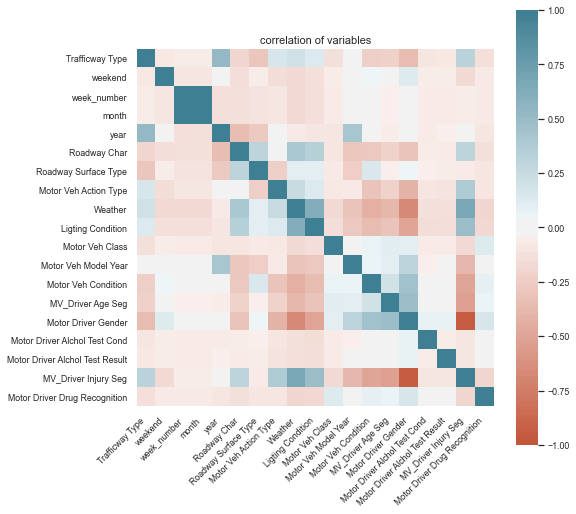

In [33]:

#### check correlation
wa0_0 = wa0.loc[(wa0['year'].between(2014, 2019, inclusive=True)) & (wa0['Colli_Unit_Colli_Unit_Typ_Surr_Key']==1)]  #Limiting to drivers so severity include all of those impacted, while we look at attributes of MV drivers only.
crwa0 = wa0_0[['Trafficway Type','weekend','week_number','month','year','Roadway Char','Roadway Surface Type','Motor Veh Action Type','Weather','Ligting Condition','Motor Veh Class','Motor Veh Model Year','Motor Veh Condition', 'MV_Driver Age Seg','Motor Driver Gender','Motor Driver Alchol Test Cond','Motor Driver Alchol Test Result','MV_Driver Injury Seg','Motor Driver Drug Recognition']]
# Categorical -> Numerical
crwa2 = crwa0.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

sns.set(font_scale=0.8)
fig, ax = plt.subplots(figsize=(8, 8))

cr2_p = sns.heatmap(
    crwa2.corr(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
cr2_p.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
cr2_p.set_title('correlation of variables', fontsize=11);

We can see that age and gender show higher correlation with vehicle attributes, which we could still say are representation of personal attributes implying individual's choice and style, and little correlation with other circumstantial attributes such as weather, road characteristics or road/lighting condition. We can say the latter suggests there is not much we would be missing to proceed with SDOT data primarily.

##### Observation_4. Personal attributes do not suggest to be siginificant variables to the crashes.

Below is a one last look at this data narrowing down to injury cases only.

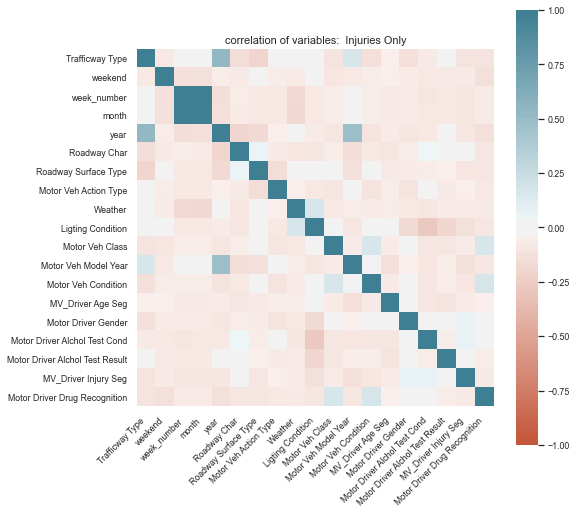

In [34]:
#### check correlation
#Limiting to drivers so severity include all of those impacted, while we look at attributes of MV drivers only.
#Limiting to Fatality and traffic injury
crwa0_0 = crwa0.loc[(crwa0['MV_Driver Injury Seg']=='1_Fatal or Serious') | (crwa0['MV_Driver Injury Seg']=='2_Injury evd or pssb')]

# Categorical -> Numerical
crwa3 = crwa0_0.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

sns.set(font_scale=0.8)
fig, ax = plt.subplots(figsize=(8, 8))

cr3_p = sns.heatmap(
    crwa3.corr(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
cr3_p.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
cr3_p.set_title('correlation of variables:  Injuries Only', fontsize=11);

<br>

#### Datasets: Weather data (NOAA) and Traffic Flow Counts datasets<br>
For the above observations, we are not going to go further with the weather data.<br> 
As for the Traffic Flow Counts data, while it should provide the perfect negative crash dataset, the number of negative records could be hypothetically as many as 13.5 billion, that would make the positive data and negative data significantly unbalanced and prediction to positive results would be cosmically too small which defys the purpose of alerting and educating about the risks. The data also appears not to contain latitude and logitude info thus would require cleansig work on this and SDOT data to merge them.
Therefore, for the negative data set we will proceed with building it up by using the SDOT dataset, that is a commonly used method [a senior Data Scientist at Esri](https://medium.com/geoai/using-machine-learning-to-predict-car-accident-risk-4d92c91a7d57) introduces. This creation will be convered in Data Preparation. (Or Large research institutes may be able to develop an algorithm to train data without negative data ([reference](https://www.riken.jp/en/news_pubs/research_news/pr/2018/20181126_2/index.html)). Hopefully such algorithm will be available in a Python library soon.)</font>


##### Lastly as part of data understanding, I have created HeatMapWithTime geo maps with SDOT data that display hourly collision occurence in [another notebook](https://github.com/Yoshie-T/Coursera_Capstone/blob/master/DS-9_Capstone_wk1.ipynb). (<- dummy link, to be edited)



### Data Preparation

#### Creating negative examples

In [35]:
import datetime
# Removing rows with null Y or null X
sdot['LocNaN'] = pd.Series(dtype='object')                           # begin with one that's very saisho ni dupe purge toka shita mono
sdot['LocNaN'] = np.where(sdot.Y.isna(), 'True', 'False')
sdP = sdot.loc[sdot['year'].between(2004, 2019, inclusive=True)]
sdP = sdP.loc[(sdot['LocNaN'] == 'False')]
sdP['Crash']=1                                                 #Mark Crash as positive result

In [36]:
sdP['hour'] = sdP['INCDATE'].dt.hour
sdP['dayofweek'] = sdP['INCDATE'].dt.dayofweek
sdP['weekend'] = sdP['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
sdP['week_number'] = sdP['INCDATE'].dt.week
sdP['month'] = sdP['INCDATE'].dt.month
sdP['year'] = sdP['INCDATE'].dt.year
sdP = sdP.loc[sdP['year'].between(2004, 2019, inclusive=True)]   #making sure (if randomizing made some records into 2003 or 2020, to remove)


In [37]:
#Making negative dataset_1 with randomized date & geolocation
sd1 = sdP.copy()
sd1['INCDTTM'] = sdP['INCDTTM'] + datetime.timedelta(days=1)
#negative dataset_2
sd2 = sd1.copy()
sd2['INCDTTM'] = sd2['INCDTTM'] + datetime.timedelta(hours=11)
#negative dataset_3
sd3 = sd1.copy()
sd3['INCDTTM'] = sd3['INCDTTM'] - datetime.timedelta(minutes=30)

#randomizing geolocation 
sd2['Y'] -= 0.3
sd2['X'] += 0.6
sd3['Y'] += 0.7
sd3['X'] -= 0.4

In [38]:
#Flag negative examples
sd1.loc[(sd1['X']==sdP['X']) & (sd1['Y']==sdP['Y']) & (sd1['INCDTTM']==sdP['INCDTTM']), 'Crash'] = 1
sd2.loc[(sd2['X']==sdP['X']) & (sd2['Y']==sdP['Y']) & (sd2['INCDTTM']==sdP['INCDTTM']), 'Crash'] = 1
sd3.loc[(sd3['X']==sdP['X']) & (sd3['Y']==sdP['Y']) & (sd3['INCDTTM']==sdP['INCDTTM']), 'Crash'] = 1

In [39]:
print("shape of sdP, sd1, sd2, sd3, respectively: ", sdP.shape, sd1.shape, sd2.shape, sd3.shape)

shape of sdP, sd1, sd2, sd3, respectively:  (209511, 48) (209511, 48) (209511, 48) (209511, 48)


In [40]:
print("sd1 Crash=True count: ", sd1['Crash'].value_counts())  #checking if any match with positive (sdP) data

sd1 Crash=True count:  1    209511
Name: Crash, dtype: int64


In [41]:
values = {'Crash': 0}               #populating where na
sd1.fillna(value=values, inplace=True)
sd2.fillna(value=values, inplace=True)
sd3.fillna(value=values, inplace=True)

In [42]:
# append 3 as 1 negative dataset
s_ng00 = sd1.append(sd2, ignore_index=True)
s_ng0 = s_ng00.append(sd3, ignore_index=True)

In [43]:
#Redo dayofweek, numofweek, hour, month, year
s_ng0['hour'] = s_ng0['INCDATE'].dt.hour
s_ng0['dayofweek'] = s_ng0['INCDATE'].dt.dayofweek
s_ng0['weekend'] = s_ng0['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
s_ng0['week_number'] = s_ng0['INCDATE'].dt.week
s_ng0['month'] = s_ng0['INCDATE'].dt.month
s_ng0['year'] = s_ng0['INCDATE'].dt.year
s_ng0 = s_ng0.loc[s_ng0['year'].between(2004, 2019, inclusive=True)]   #making sure (if randomizing made some records into 2003 or 2020, to remove)

# select only the columns that are relant for the negative set
s_ng = s_ng0[['X','Y','ADDRTYPE','INCDATE','INCDTTM','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SEGLANEKEY','CROSSWALKKEY','year','dayofweek','week_number','month','weekend','hour']]
s_ng.shape

(628533, 18)

##### We have datasets with 1 positive : 3 negative records


#### Now append positve and negative data in 1 set. Pre-process, Feature, Test-Train-Split, and Normalize.

In [44]:
s_trfc = sdP.append(s_ng, ignore_index=True)
s_trfc.shape

(838044, 48)

Replacing categorical values to numerical values.

In [ ]:
s_trfc.groupby(['INATTENTIONIND'])['SEVERITYDESC'].value_counts(normalize=True)

In [45]:
s_trfc['INATTENTIONIND'].replace(to_replace=['Y','NaN'], value=[1,0], inplace=True)
s_trfc['UNDERINFL'].replace(to_replace=['N','Y','NaN'], value=['0','1','0'], inplace=True)


In [46]:
#One Hot Encoding
s_trfc = pd.concat([s_trfc,pd.get_dummies(s_trfc['SEVERITYDESC'])], axis=1)
s_trfc = pd.concat([s_trfc,pd.get_dummies(s_trfc['WEATHER'])], axis=1)
s_trfc = pd.concat([s_trfc,pd.get_dummies(s_trfc['ROADCOND'])], axis=1)
s_trfc = pd.concat([s_trfc,pd.get_dummies(s_trfc['LIGHTCOND'])], axis=1)
s_trfc = pd.concat([s_trfc,pd.get_dummies(s_trfc['SEGLANEKEY'])], axis=1)
s_trfc = pd.concat([s_trfc,pd.get_dummies(s_trfc['CROSSWALKKEY'])], axis=1)
s_trfc = pd.concat([s_trfc,pd.get_dummies(s_trfc['ADDRTYPE'])], axis=1)

In [47]:
display(s_trfc)

X          Y  OBJECTID    INCKEY  COLDETKEY  REPORTNO  \
0      -122.386772  47.564720       1.0  326234.0   327734.0   E984735   
1      -122.341806  47.686934       2.0  326246.0   327746.0   E985430   
2      -122.300758  47.683047       4.0   21200.0    21200.0   1227970   
3      -122.313053  47.567241       5.0   17000.0    17000.0   1793348   
4      -122.364664  47.651234       6.0   26600.0    26600.0  04037046   
...            ...        ...       ...       ...        ...       ...   
838039 -122.729060  48.305233       NaN       NaN        NaN       NaN   
838040 -122.714961  48.223468       NaN       NaN        NaN       NaN   
838041 -122.734203  48.275576       NaN       NaN        NaN       NaN   
838042 -122.710259  48.294214       NaN       NaN        NaN       NaN   
838043 -122.742627  48.351619       NaN       NaN        NaN       NaN   

           STATUS      ADDRTYPE   INTKEY  \
0         Matched  Intersection  31893.0   
1         Matched  Intersection  24228.0   
2         Matched  Intersection  24661.0   
3       Unmatched         Block      NaN   
4       Unmatched         Block      NaN   
...           ...           ...      ...   
838039        NaN         Block      NaN   
838040        NaN         Block      NaN   
838041        NaN  Intersection      NaN   
838042        NaN         Block      NaN   
838043        NaN         Block      NaN   

                                                 LOCATION EXCEPTRSNCODE  \
0                     CALIFORNIA AVE SW AND SW GENESEE ST                 
1                               STONE AVE N AND N 80TH ST                 
2                              25TH AVE NE AND NE 75TH ST           NaN   
3           S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S           NaN   
4       6TH AVE W BETWEEN W EMERSON ST AND W NICKERSON ST           NaN   
...                                                   ...           ...   
838039                                                NaN           NaN   
838040                                                NaN           NaN   
838041                                                NaN           NaN   
838042                                                NaN           NaN   
838043                                                NaN           NaN   

       EXCEPTRSNDESC SEVERITYCODE                    SEVERITYDESC  \
0                NaN            2                Injury Collision   
1                NaN            2                Injury Collision   
2                NaN            1  Property Damage Only Collision   
3                NaN            0                         Unknown   
4                NaN            0                         Unknown   
...              ...          ...                             ...   
838039           NaN          NaN                             NaN   
838040           NaN          NaN                             NaN   
838041           NaN          NaN                             NaN   
838042           NaN          NaN                             NaN   
838043           NaN          NaN                             NaN   

       COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INJURIES  \
0         Pedestrian          2.0       1.0          0.0       1.0       1.0   
1             Angles          4.0       0.0          0.0       2.0       2.0   
2          Left Turn          2.0       0.0          0.0       2.0       0.0   
3                NaN          0.0       0.0          0.0       0.0       0.0   
4                NaN          0.0       0.0          0.0       0.0       0.0   
...              ...          ...       ...          ...       ...       ...   
838039           NaN          NaN       NaN          NaN       NaN       NaN   
838040           NaN          NaN       NaN          NaN       NaN       NaN   
838041           NaN          NaN       NaN          NaN       NaN       NaN   
838042           NaN          NaN       NaN          NaN       NaN   

In [48]:
#Feature
Feature = s_trfc[['X','Y','INATTENTIONIND','UNDERINFL','year','dayofweek','week_number','month','weekend','hour','Blowing Sand/Dirt','Clear','Fog/Smog/Smoke','Overcast','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing','Dry','Ice','Oil','Sand/Mud/Dirt','Snow/Slush','Standing Water','Wet','Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dawn','Daylight','Dusk']]
Feature.head()  #(decided not to include severity types)

,X,Y,INATTENTIONIND,UNDERINFL,year,dayofweek,week_number,month,weekend,hour,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk
0,-122.386772,47.564720,NaN,0,2019,2,47,11,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,-122.341806,47.686934,NaN,0,2019,0,47,11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,-122.300758,47.683047,NaN,0,2004,1,24,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,-122.313053,47.567241,NaN,NaN,2004,4,42,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-122.364664,47.651234,NaN,NaN,2004,4,6,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
X = Feature
X.fillna(0, inplace=True)

y=s_trfc['Crash'].values
y= np.nan_to_num(y)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [50]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)    
#random state - If you set it to None (the default), each time random seed is chosen, and you'll get different results.

In [51]:
#Normalize - Data Standardization give data zero mean and unit variance (technically should be done after train test split )
X_train= preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)

##### End of Introduction - Data Section. (Test data set will be created based on this s_trfc set in the testing section.)

## Method<br>

**Background**<br>
blah blah blha 


In [52]:
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn import tree
!pip install graphviz
import graphviz

#### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

#train and test with various max_depth
md = 7
mean_acc = np.zeros((md-1))
std_acc = np.zeros((md-1))
ConfusionMx = [];
for n in range(1,md):
    #Train model and Predict
    DT0 = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    DT_f0 = DT0.fit(X_train,y_train)
    DT_yhat0 = DT0.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, DT_yhat0)
    
    std_acc[n-1]=np.std(DT_yhat0==y_test)/np.sqrt(DT_yhat0.shape[0])
              
mean_acc


array([0.74932134, 0.74932134, 0.74908269, 0.74907672, 0.74701836,
       0.7469229 ])

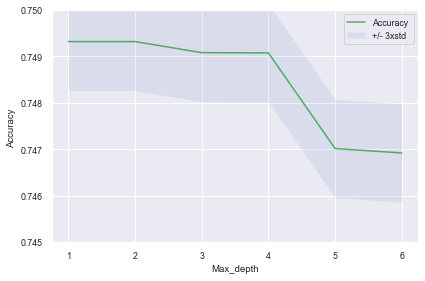

In [54]:
plt.plot(range(1,md),mean_acc,'g')
plt.fill_between(range(1,md),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Max_depth')
plt.ylim([0.745, 0.750])
plt.tight_layout()
plt.show()


In [55]:
print( "The best accuracy was with", mean_acc.max(), "with max_depth=", mean_acc.argmax()+1) 


The best accuracy was with 0.7493213371596991 with max_depth= 1


Accuracy check suggest the fewer the depth of branch is, (subtly) higher the accuracy. I have applied depth 6 for visualization's sake. 

[Text(412.92, 403.81714285714287, 'X <= 0.702\nentropy = 0.811\nsamples = 670435\nvalue = [502940, 167495]'),
 Text(368.28000000000003, 341.69142857142856, 'X <= -0.693\nentropy = 0.918\nsamples = 502542\nvalue = [335047, 167495]'),
 Text(323.64, 279.5657142857143, 'entropy = 0.0\nsamples = 167537\nvalue = [167537, 0]'),
 Text(412.92, 279.5657142857143, 'X <= -0.329\nentropy = 1.0\nsamples = 335005\nvalue = [167510, 167495]'),
 Text(223.2, 217.44, 'Sleet/Hail/Freezing Rain <= 21.929\nentropy = 1.0\nsamples = 3347\nvalue = [1711, 1636]'),
 Text(178.56, 155.3142857142857, 'X <= -0.329\nentropy = 1.0\nsamples = 3346\nvalue = [1711, 1635]'),
 Text(89.28, 93.18857142857144, 'week_number <= -1.639\nentropy = 1.0\nsamples = 3134\nvalue = [1595, 1539]'),
 Text(44.64, 31.062857142857126, 'entropy = 0.988\nsamples = 110\nvalue = [62, 48]'),
 Text(133.92000000000002, 31.062857142857126, 'entropy = 1.0\nsamples = 3024\nvalue = [1533, 1491]'),
 Text(267.84000000000003, 93.18857142857144, 'Y <= -0.2

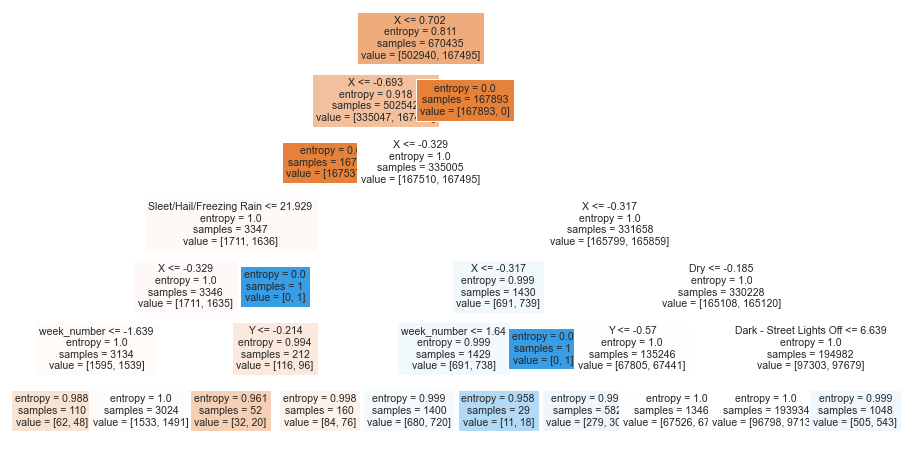

In [56]:
#Decision Tree 
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 6)  
DT.fit(X_train,y_train)
DT_yhat = DT.predict(X_test)

#Visualize

fig_dt = plt.figure(figsize=(16,8))
ax_dt = fig_dt.add_subplot(1,1,1)

#木構造を出力
tree.plot_tree(DT, fontsize=10.5, ax = ax_dt, feature_names = ['X','Y','INATTENTIONIND','UNDERINFL','year','dayofweek','week_number','month','weekend','hour','Blowing Sand/Dirt','Clear','Fog/Smog/Smoke','Overcast','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing','Dry','Ice','Oil','Sand/Mud/Dirt','Snow/Slush','Standing Water','Wet','Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dawn','Daylight','Dusk'], filled = True)


This does not convince decision tree is a strongly suitable modeling method for this project.

#### K Nearest Neighbor(KNN)

In [57]:
#data size may be too large, thus limiting to year 2018 - 2019

X6 = Feature.loc[(Feature['year'].between(2018, 2019, inclusive=True))]
X6.fillna(0, inplace=True)

y6_0 = s_trfc.loc[(s_trfc['year'].between(2018, 2019, inclusive=True))]
y6 = y6_0['Crash'].values
y6 = np.nan_to_num(y6)

X6_train, X6_test, y6_train, y6_test = train_test_split( X6, y6, test_size=0.2, random_state=4) 

X6_train= preprocessing.StandardScaler().fit(X6_train).transform(X6_train)
X6_test= preprocessing.StandardScaler().fit(X6_test).transform(X6_test)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [58]:
from sklearn.neighbors import KNeighborsClassifier

Ks = 10
kmean_acc = np.zeros((Ks-1))
kstd_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    knn6 = KNeighborsClassifier(n_neighbors = n)
    knn6.fit(X6_train,y6_train)
    knn6_yhat=knn6.predict(X6_test)
    kmean_acc[n-1] = metrics.accuracy_score(y6_test, knn6_yhat)
    
    kstd_acc[n-1]=np.std(knn6_yhat==y6_test)/np.sqrt(knn6_yhat.shape[0])

kmean_acc

array([0.54860658, 0.65463749, 0.58436752, 0.65556281, 0.61005879,
       0.65850207, 0.626769  , 0.66410843, 0.63732854])

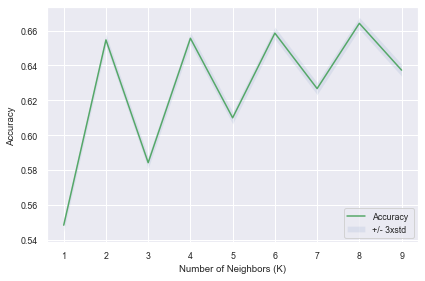

In [59]:
plt.plot(range(1,Ks),kmean_acc,'g')
plt.fill_between(range(1,Ks),kmean_acc - 1 * kstd_acc,kmean_acc + 1 * kstd_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [60]:
print( "The best accuracy was with", mean_acc.max(), "with k=", kmean_acc.argmax()+1) 

The best accuracy was with 0.7493213371596991 with k= 8


In [62]:
k = (kmean_acc.argmax()+1)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X6_train,y6_train)
yhat_k = knn.predict(X6_test)

In [ ]:
#Visualize



#### Support Vector Machine

In [63]:
import scipy.optimize as opt
from sklearn import svm

#Train & test with kernel= poly, sigmoid, linear, rbf

#Train
svm_pl = svm.SVC(kernel='poly')
svm_pl.fit(X6_train, y6_train) 
#Test
predSvm_pl = svm_pl.predict(X6_test)
#Score
poly = metrics.accuracy_score(y6_test, predSvm_pl)
print("Test set Accuracy with kernel=poly: ", poly)

#Train
svm_sg = svm.SVC(kernel='sigmoid')
svm_sg.fit(X6_train, y6_train) 
#Test
predSvm_sg = svm_sg.predict(X6_test)
#Score
sg = metrics.accuracy_score(y6_test, predSvm_sg)
print("Test set Accuracy with kernel=sigmoid: ", sg)

#Train
svm_ln = svm.SVC(kernel='linear')
svm_ln.fit(X6_train, y6_train) 
#Test
predSvm_ln = svm_ln.predict(X6_test)
#Score
ln = metrics.accuracy_score(y6_test, predSvm_ln)
print("Test set Accuracy with kernel=linear: ", ln)

#Train
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X6_train, y6_train) 
#Test
predSvm_rbf = svm_rbf.predict(X6_test)
#Score
rbf = metrics.accuracy_score(y6_test, predSvm_rbf)


print("Test set Accuracy with kernel=rbf: ", rbf)




Test set Accuracy with kernel=poly:  0.7429784454604833
Test set Accuracy with kernel=sigmoid:  0.7146745046810363
Test set Accuracy with kernel=linear:  0.7472240365774004
Test set Accuracy with kernel=rbf  0.7375898105813194


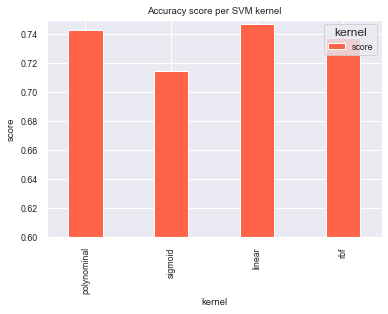

In [70]:
accuracy = [poly, sg, ln, rbf]

svm_score = pd.DataFrame(accuracy, index=['polynominal','sigmoid','linear','rbf'])
svm_score.columns = ['score']
svm_score.columns.name = 'kernel'


svm_score.plot(kind='bar', figsize=(6, 4), width=0.4, color='tomato')
plt.ylim([0.6,0.75])
plt.xlabel('kernel') 
plt.ylabel('score') 
plt.title('Accuracy score per SVM kernel') 

plt.show()

Kernel = linear scores highest accuracy.

#### Logistic Regression

In [ ]:
(To do the same as above 3)

#### Evaluation with test set

## Results

## Discussion

## Conclusion

## References

## Acknowledgement

## Appendix

There are really two distinct parts of the inputs: the static features and the dynamic features.
The static features are the parts of the input data that, for the most part, do not change with time. This includes features derived from the road geometry, such as curvature or other properties, such as speed limit or population density. Of course, these aren’t static per say, but they are slowly changing so we can treat them as constant for all intents and purposes.
The dynamic features change depending on when we are making the prediction. These are the weather feeds, solar geometry, and time variables (hour, month, day, etc).

#### in Appendix

In [ ]:
import pandas as pd
tfc = pd.read_csv('2018_Traffic_Flow_Counts.csv')
tfc.shape


In [ ]:
tfc.head(10)


In [ ]:
tfc.info()
